In [107]:
import numpy as np
from scipy.constants import g, pi
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [108]:
%matplotlib notebook

In [110]:
style = {'description_width': 'initial'}
A_button = widgets.FloatText(value = 0, description='Положение точки A', style = style)
U0_button = widgets.FloatText(value = 1000, description='Скорость ракеты', style = style)
U0__button = widgets.FloatText(value = 2000, description='Скорость противоракеты', style = style)
alpha_button = widgets.FloatText(value = pi/4, description='Угол старта ракеты', style = style)
err_button = widgets.FloatText(value = 0.01, description='Размер ошибки', style = style)
T1_button = widgets.IntText(value = 15, description='Время окончания измерений', style = style)
T0_button = widgets.IntText(value = 40, description='Время начала измерений', style = style)
display(A_button)
display(U0_button)
display(U0__button)
display(T1_button)
display(T0_button)

FloatText(value=0.0, description='Положение точки A', style=DescriptionStyle(description_width='initial'))

FloatText(value=1000.0, description='Скорость ракеты', style=DescriptionStyle(description_width='initial'))

FloatText(value=2000.0, description='Скорость противоракеты', style=DescriptionStyle(description_width='initia…

IntText(value=15, description='Время окончания измерений', style=DescriptionStyle(description_width='initial')…

IntText(value=40, description='Время начала измерений', style=DescriptionStyle(description_width='initial'))

In [111]:
A_ = A_button.value
u0 = U0_button.value
alpha = alpha_button.value
err = err_button.value
T0 = T0_button.value
T1 = T1_button.value
u0_ = U0__button.value

In [121]:
flight_time = 2*u0*np.sin(alpha)/g
t = np.linspace(0, flight_time, 1000)
D = u0**2*np.sin(2*alpha)/g
C = 0.75*(D-A_)
x = lambda t, alpha1=alpha, x0=0, u0=u0: x0 + u0*np.cos(alpha1)*t
y = lambda t, alpha1=alpha, y0=0, u0=u0: y0 + u0*np.sin(alpha1)*t - (g*t**2)/2
te = np.linspace(15,T0,26)
xe = x(te)
ye = y(te)*(1+err*np.random.randn(26))
A = np.matrix([xe**2,xe,np.ones(26)]).T
koef = np.linalg.inv(A.T*A)*A.T*np.matrix(ye).T
x0 = (-koef[1,0] + np.sqrt(koef[1,0]**2-4*koef[0,0]*koef[2,0]))/(2*koef[0,0])
alpha_ = np.arcsin((C-x0)*g/(u0_**2))/2
f = lambda t: (x(t[0], alpha, 0, u0) - x(t[0]-T0, t[1], C, -u0_))**2+\
    (koef[0,0]*(x(t[0], alpha, 0, u0)**2)+koef[1,0]*x(t[0], alpha, 0, u0) + koef[2,0] - y(t[0]-T0, t[1], 0, u0_))**2 #- t[0]
c = minimize(f,[T0,pi/4],bounds=[(T0, u0*np.sin(alpha)/g), (0, pi/2)], tol= 1e-15)['x']

<IPython.core.display.Javascript object>


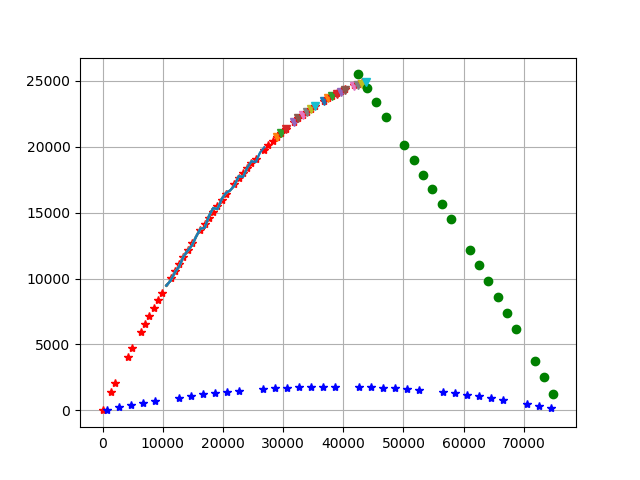

interactive(children=(FloatSlider(value=0.0, description='t', max=144.20964981651179, step=1.0), Output()), _d…

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
def plotter(t):
    #ax.clear()
    if t < c[0]:
        ax.plot(x(t), y(t), 'r*')
    if(T1 < t < T0):
        ax.plot(xe[:min(int(t)-T1, T0+1-T1)], ye[:min(int(t)-T1, T0+1-T1)],'-')
    if T0 < t and y(t-T0,alpha_,0,u0_) > 0:
        ax.plot(x(t-T0,alpha_,C,-u0_), y(t-T0,alpha_,0,u0_),'b*')
    if T0 < t < c[0]+1:
        ax.plot(x(t), koef[0,0]*x(t)**2 + koef[1,0]*x(t) + koef[2,0], 'v') 
        ax.plot( x(t-T0,c[1],C,-u0_), y(t-T0, c[1], 0, u0_), 'go')
interact(plotter, t=widgets.FloatSlider(min=0,max=flight_time,step=1,value=0));

время полета {{flight_time}}

array([55.02720366,  0.58566154])

In [79]:
#koef = np.linalg.lstsq(A, ye,rcond=None)[0]
#koef = np.matrix(koef).T

<IPython.core.display.Javascript object>


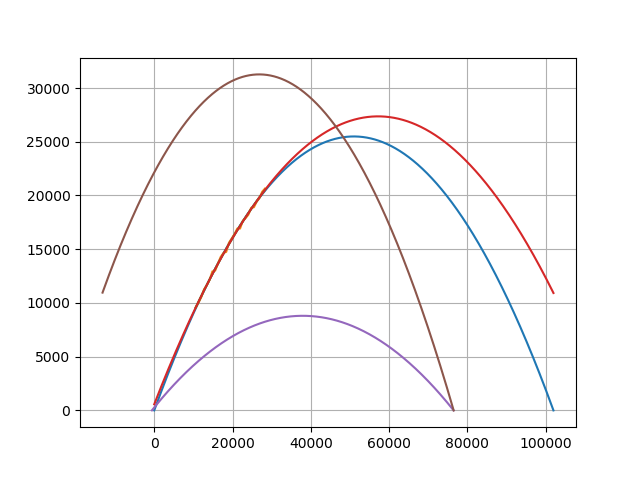

In [25]:
plt.figure()
plt.plot(x(t),y(t))
plt.grid()
plt.plot(xe, ye)
plt.plot(xe, A*koef)
plt.plot(x(t), np.matrix([x(t)**2,x(t),np.ones(t.shape[0])]).T*koef)
plt.plot(x(t,alpha_,C,-u0_)[y(t,alpha_,0,u0_)>-10],y(t,alpha_,0,u0_)[y(t,alpha_,0,u0_)>-10])
plt.plot(x(t,c[1],C,-u0_), y(t,c[1],0,u0_))